In [ ]:
#%% 

import pandas as pd
# !pip install spotipy
import spotipy
# !pip install dask
import dask.dataframe as dd
from spotipy.oauth2 import SpotifyClientCredentials
# from google.colab import userdata
# from google.colab import drive
import time
import os

# drive.mount('/content/drive')

In [ ]:
#%% 

def load_data(file_path):
    return dd.read_csv(file_path)

This is a log message.


In [ ]:
#%% 

def authenticate_spotify():
    # Set environment variables
    os.environ['SPOTIFY_CLIENT_ID'] = '4187992fdb764829b6b2ce20718027c0'
    os.environ['SPOTIFY_CLIENT_SECRET'] = '4adc98b676ed40e1b43c521b355ef809'

    # # Set up Spotify API credentials
    client_id = os.environ.get('SPOTIFY_CLIENT_ID')
    client_secret = os.environ.get('SPOTIFY_CLIENT_SECRET')

    
    if client_id and client_secret:
        credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
        sp = spotipy.Spotify(client_credentials_manager=credentials_manager)
        print("Spotify authentication successful.")
        return sp
    else:
        print("Failed to authenticate with Spotify.")
        return None

In [ ]:
#%% 

def get_artist_genre(sp, artist_name):
    try:
        if sp:
            results = sp.search(q=artist_name, type='artist', limit=1)
            if results['artists']['items']:
                artist = results['artists']['items'][0]
                genres = artist['genres']
                return genres[0] if genres else 'Unknown'
    except Exception as e:
        print(f"Failed to get genre for artist {artist_name}: {e}")
    return 'Unknown'

In [ ]:
#%% 

def get_artist_info(sp, artist_name):
    try:
        if sp:
            results = sp.search(q=artist_name, type='artist', limit=1)
            if results['artists']['items']:
                artist = results['artists']['items'][0]
                artist_id = artist['id']
                artist_info = sp.artist(artist_id)
                popularity = artist_info['popularity']
                followers = artist_info['followers']['total']
                return popularity, followers
    except Exception as e:
        print(f"Failed to get info for artist {artist_name}: {e}")
    return None, None

In [ ]:
#%% 

def get_track_info(sp, track_name, artist_name):
    try:
        if sp:
            results = sp.search(q=f'track:{track_name} artist:{artist_name}', type='track', limit=1)
            if results['tracks']['items']:
                track = results['tracks']['items'][0]
                track_id = track['id']
                track_info = sp.track(track_id)
                popularity = track_info['popularity']
                audio_features = sp.audio_features([track_id])[0]
                return popularity, audio_features
    except Exception as e:
        print(f"Failed to get info for track {track_name} by artist {artist_name}: {e}")
    return None, None

In [ ]:
#%% 

def apply_functions(df, sp):
    df['genre'] = df['artname'].map_partitions(lambda pdf: pdf.map(lambda row: get_artist_genre(sp, row['artname'])))
    artist_cols = ['artist_popularity', 'artist_followers']
    temp_df = df[['artname'] + artist_cols].copy()
    df[artist_cols] = df[['artname'] + artist_cols].apply(lambda row: get_artist_info(sp, row['artname']), axis=1).apply(pd.Series)
    track_cols = ['track_popularity', 'audio_features']
    df = df.dropna(subset=artist_cols, how='all').reset_index(drop=True)
    combined_cols = artist_cols + track_cols
    df = pd.concat([df.drop(columns=combined_cols), df[combined_cols]], axis=1)
    df[track_cols] = df.apply(lambda row: get_track_info(sp, row['track_name'], row['artname']), axis=1).apply(pd.Series)
    return df

In [ ]:
#%% 

def save_data(df, path):
    df.compute().to_csv(path, index=False)

In [ ]:
#%% 

if __name__ == '__main__':
    file_path = 'dataset.csv'
    output_path = 'dataset_modified.csv'
    sp = authenticate_spotify()
    ddf = load_data(file_path)
    df = apply_functions(ddf, sp)
    save_data(df, output_path)

In [ ]:
#%% 

def apply_functions(df, sp):
    df['genre'] = df['artname'].map_partitions(lambda x: x.map(lambda y: get_artist_genre(sp, y)))
    # rest of your code

    artist_cols = ['artist_popularity', 'artist_followers']
    temp_df = df[['artname'] + artist_cols].copy()
    df[artist_cols] = df[['artname'] + artist_cols].apply(lambda row: get_artist_info(sp, row['artname']), axis=1).apply(pd.Series)
    track_cols = ['track_popularity', 'audio_features']
    df = df.dropna(subset=artist_cols, how='all').reset_index(drop=True)
    combined_cols = artist_cols + track_cols
    df = pd.concat([df.drop(columns=combined_cols), df[combined_cols]], axis=1)
    df[track_cols] = df.apply(lambda row: get_track_info(sp, row['track_name'], row['artname']), axis=1).apply(pd.Series)
    return df

In [ ]:
#%% 

def save_data(df, path):
    df.compute().to_csv(path, index=False)

In [ ]:
#%% 

if __name__ == '__main__':
    file_path = 'dataset.csv'
    output_path = 'dataset_modified.csv'
    sp = authenticate_spotify()
    ddf = load_data(file_path)
    df = apply_functions(ddf, sp)
    save_data(df, output_path)

In [ ]:
#%% 

def apply_functions(df, sp):
    df['genre'] = df['artname'].map_partitions(lambda x: x.map(lambda y: get_artist_genre(sp, y)))
    artist_cols = ['artist_popularity', 'artist_followers']
    df[artist_cols] = df['artname'].map_partitions(lambda x: x.map(lambda y: get_artist_info(sp, y))).apply(pd.Series)
    track_cols = ['track_popularity', 'audio_features']
    df = df.dropna(subset=artist_cols, how='all').reset_index(drop=True)
    combined_cols = artist_cols + track_cols
    df = pd.concat([df.drop(columns=combined_cols), df[combined_cols]], axis=1)
    df[track_cols] = df.apply(lambda row: get_track_info(sp, row['track_name'], row['artname']), axis=1).apply(pd.Series)
    return df

In [ ]:
#%% 

def save_data(df, path):
    df.compute().to_csv(path, index=False)

In [ ]:
#%% 

if __name__ == '__main__':
    file_path = 'dataset.csv'
    output_path = 'dataset_modified.csv'
    sp = authenticate_spotify()
    ddf = load_data(file_path)
    df = apply_functions(ddf, sp)
    save_data(df, output_path)

In [ ]:
#%% 

def calculate_error_metrics(data, predictions):
    data= data[-len(predictions):]
    mae = mean_absolute_error(data, predictions)
    mape = mean_absolute_percentage_error(data, predictions)
    logging.info("""Evaluating with MAE and MAPE """)
    logging.info(f"Mean Absolute Error: {mae}")
    logging.info(f"Mean Absolute Percentage Error: {mape}")

Testing stationarity of data:
ADF Statistic: -2.883602424447067
p-value: 0.04728831004955812
Data is likely stationary.

Number of differences required : 1
Seasonal differences required: 0


Testing stationarity of scaled training data:
ADF Statistic: -10.452416485113096
p-value: 1.426848496782211e-18
Data is likely stationary.


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1578.236, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1612.420, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1575.066, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1579.935, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1610.842, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1576.870, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1576.932, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1575.145, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1573.222, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1575.037, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1575.095, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1578.181, Time=0.03 sec



Auto ARIMA identified parameters: (1, 0, 0), (0, 0, 0, 0)
model order: (1, 0, 0), 
model seasonal order: (0, 0, 0, 0)


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1573.727, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.082 seconds


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  251
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -784.611
Date:                Tue, 30 Apr 2024   AIC                           1573.222
Time:                        18:35:32   BIC                           1580.273
Sample:                    02-01-2002   HQIC                          1576.060
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3831      0.043      8.923      0.000       0.299       0.467
sigma2        30.3674      2.072     14.656      0.000      26.306      34.429
Ljung-Box (L1) (Q):                   0.03   Jarque-

Evaluating with MAE and MAPE 
Mean Absolute Error: 16.53172475092357
Mean Absolute Percentage Error: 0.18878794915525318


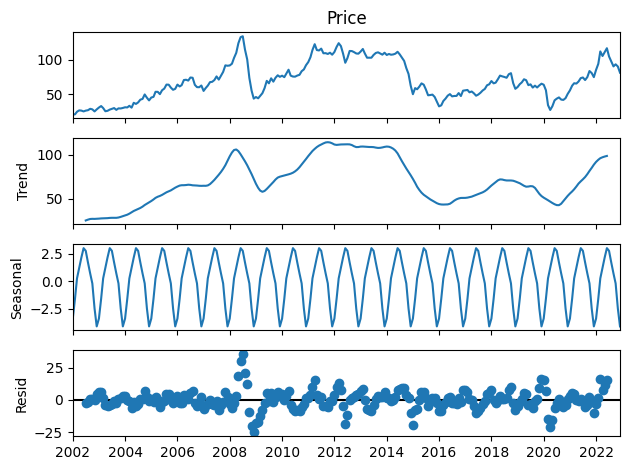

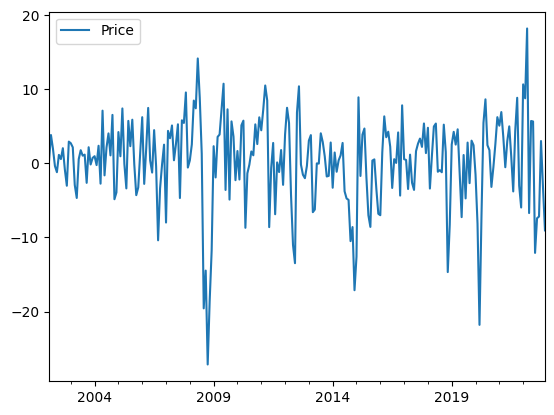

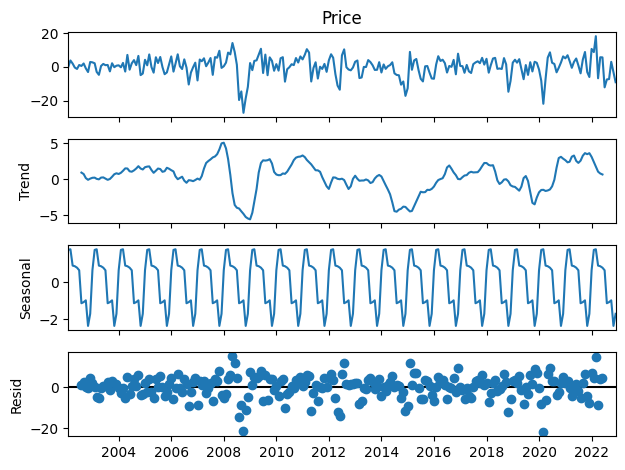

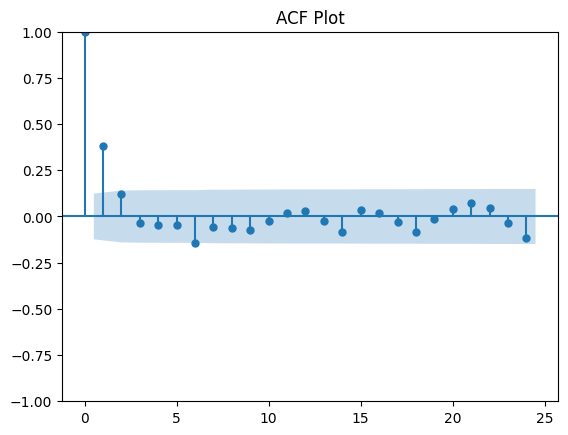

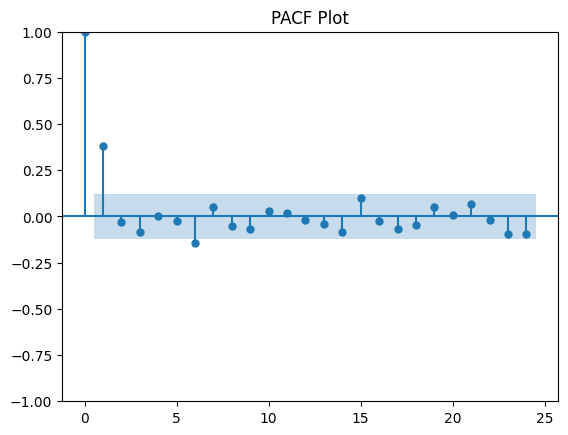

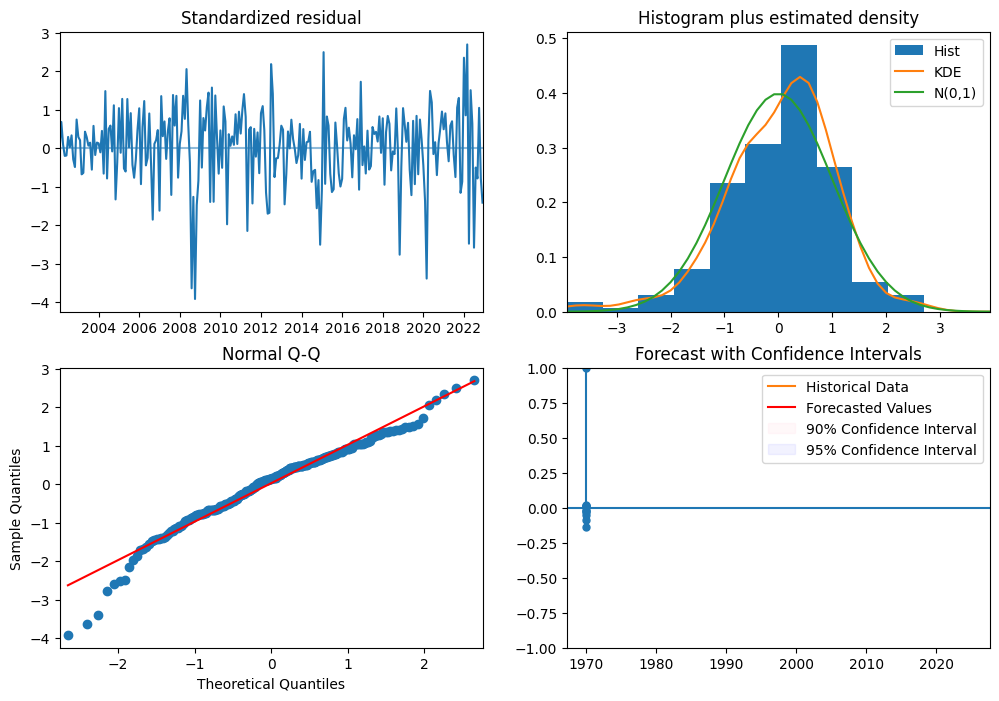

In [ ]:
#%% 

# todo: improve readability of logs
data = load_data()
plot_data(data)
test_stationarity(data)
differenced_data = preprocess_data(data)
plot_differenced_data(differenced_data)
check_seasonal_differencing(data)
plot_seasonal_decomposition(differenced_data)
plot_acf_pacf_plots(differenced_data)
plot_seasonal_data(data)
evaluate_stationarity(differenced_data)
model = auto_arima_model(differenced_data)
plot_residuals(model)
results = fit_sarimax_model(differenced_data, model.order, model.seasonal_order)

# Capture the returned values from forecast_future_values
predictions, forecast_summary_90, forecast_summary_95 = forecast_future_values(data['Price'], model.order, model.seasonal_order, 24)

# Now you can use 'predictions' in the following functions
plot_forecast_with_confidence_intervals(data['Price'], predictions, forecast_summary_90, forecast_summary_95)
calculate_error_metrics(data['Price'], predictions)